In [1]:
# Import the necessary libraries
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch import nn, optim
import torch.nn.functional as F

In [2]:
# Loading the Fashion-MNIST dataset
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [3]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [19]:
# Define the network architecture

model = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),
                     
                      nn.Dropout(0.4),
                      nn.Linear(256, 128),
                      nn.ReLU(),                    
                      nn.Dropout(0.3),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Dropout(0.2),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim = 1)
                     )



criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-2)

epochs = 20

train_loss = []
test_loss = []
Accuracy = []
for e in range(epochs):
    running_loss_train = 0

    for images, labels in trainloader:

        images = images.view(images.shape[0], -1)

        optimizer.zero_grad()

        pred = model.forward(images)

        loss_train = criterion(pred, labels)
        loss_train.backward()
        optimizer.step()

        running_loss_train += loss_train.item()
        
    else:
        running_loss_test = 0
        accuracy = 0

        with torch.no_grad():

            model.eval()

            for images, labels in testloader:
                images = images.view(images.shape[0], -1)
                log_ps = model(images)
                running_loss_test += criterion(log_ps, labels)

                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
    
    
    model.train()
    
    print(f'Epoch: {e + 1} | Train loss: {running_loss_train/len(trainloader)} | Test loss: {running_loss_test/len(testloader)} | Accuracy: {(accuracy/len(testloader))*100}%' )
    
    train_loss.append(running_loss_train/len(trainloader))
    
    test_loss.append(running_loss_test/len(testloader))
    Accuracy.append((accuracy/len(testloader))*100)
    

Epoch: 1 | Train loss: 1.5559734969632204 | Test loss: 0.860092043876648 | Accuracy: 71.09872436523438%
Epoch: 2 | Train loss: 0.8392320856737938 | Test loss: 0.6491135954856873 | Accuracy: 75.14928436279297%
Epoch: 3 | Train loss: 0.6975859186923834 | Test loss: 0.5775827765464783 | Accuracy: 78.00557708740234%
Epoch: 4 | Train loss: 0.6249958909650856 | Test loss: 0.5333781838417053 | Accuracy: 79.99601745605469%
Epoch: 5 | Train loss: 0.5778497125484796 | Test loss: 0.4994766414165497 | Accuracy: 81.25995635986328%
Epoch: 6 | Train loss: 0.5452547903412949 | Test loss: 0.4840579330921173 | Accuracy: 82.06608581542969%
Epoch: 7 | Train loss: 0.518369185851454 | Test loss: 0.46021324396133423 | Accuracy: 83.07125854492188%
Epoch: 8 | Train loss: 0.49698466888622944 | Test loss: 0.4539318084716797 | Accuracy: 83.62858581542969%
Epoch: 9 | Train loss: 0.4769974632907524 | Test loss: 0.4338386654853821 | Accuracy: 83.96695709228516%
Epoch: 10 | Train loss: 0.46396563197376883 | Test loss

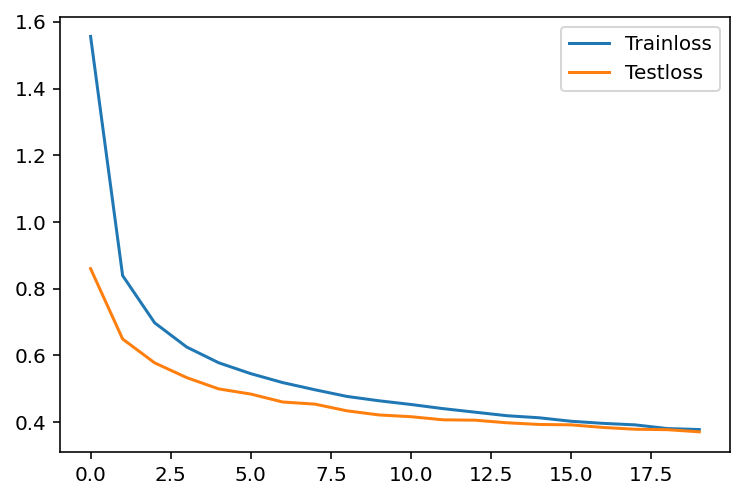

In [22]:
plt.plot(train_loss, label = 'Trainloss')
plt.plot(test_loss, label = 'Testloss')

plt.plot()
plt.legend()
plt.show()

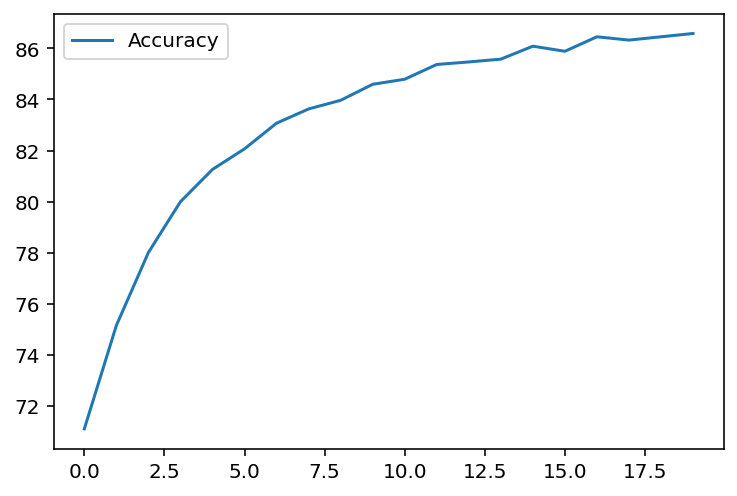

In [23]:
plt.plot(Accuracy, label = 'Accuracy')
plt.plot()
plt.legend()
plt.show()

In [24]:
# Define view_classify function
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

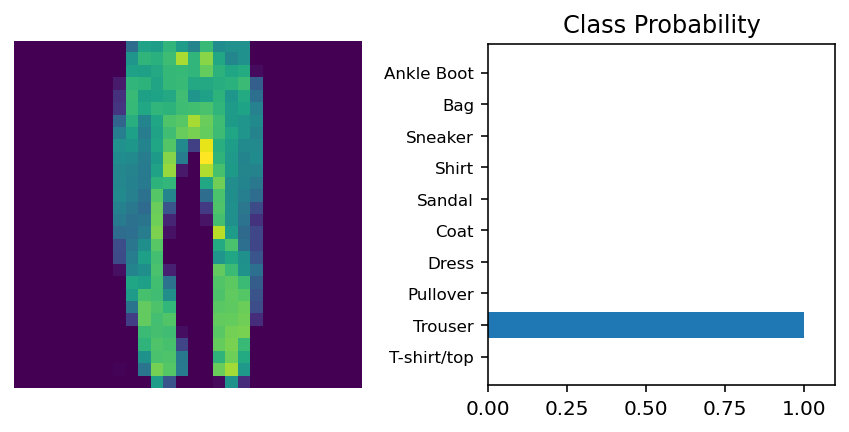

In [25]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Testing out the network
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]

# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# Calculate the class probabilites (log softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilites
view_classify(img, ps, version='Fashion')

In [26]:
misclassified = [index for index,value in enumerate(equals) if value.item() is False] 

In [27]:
misclassified

[1, 4, 13, 15]

In [29]:
print("My model: \n\n", model, "\n")
print("The state dict keys: \n\n", model.state_dict().keys())

My model: 

 Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.4, inplace=False)
  (3): Linear(in_features=256, out_features=128, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.3, inplace=False)
  (6): Linear(in_features=128, out_features=64, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.2, inplace=False)
  (9): Linear(in_features=64, out_features=10, bias=True)
  (10): LogSoftmax(dim=1)
) 

The state dict keys: 

 odict_keys(['0.weight', '0.bias', '3.weight', '3.bias', '6.weight', '6.bias', '9.weight', '9.bias'])


In [30]:
torch.save(model.state_dict(), 'checkpoint.pth')

In [31]:
state_dict = torch.load("checkpoint.pth")
print(state_dict.keys())

odict_keys(['0.weight', '0.bias', '3.weight', '3.bias', '6.weight', '6.bias', '9.weight', '9.bias'])


In [32]:
# Load the state dict to the network
model.load_state_dict(state_dict)
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.4, inplace=False)
  (3): Linear(in_features=256, out_features=128, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.3, inplace=False)
  (6): Linear(in_features=128, out_features=64, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.2, inplace=False)
  (9): Linear(in_features=64, out_features=10, bias=True)
  (10): LogSoftmax(dim=1)
)
